# Laboratorio 03

1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

In [2]:
import pandas as pd

In [3]:
data = {
    'Entrenamiento': [0, 1, 2, 3, 4, 'm'],
    'Y': [0, 1, 2, 3, 4, 5],
    'X_1': [0, 1, 2, 3, 4, 5]
}

df = pd.DataFrame(data)
df

,Entrenamiento,Y,X_1
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
5,m,5,5


2. Crear una función para calcular la función de coste.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def calcular_coste(X, Y, theta_0, theta_1):
    m = len(Y)  

    predicciones = theta_0 + theta_1 * X

    errores_cuadrados = (predicciones - Y) ** 2

    coste = (1 / (2 * m)) * np.sum(errores_cuadrados)
    
    return coste

3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.

In [6]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 2, 3, 4, 5])

thetas1 = np.arange(-8, 11)

costes = []

theta_0 = 0

for theta_1 in thetas1:

    coste_actual = calcular_coste(x, y, theta_0, theta_1)
    costes.append(coste_actual)

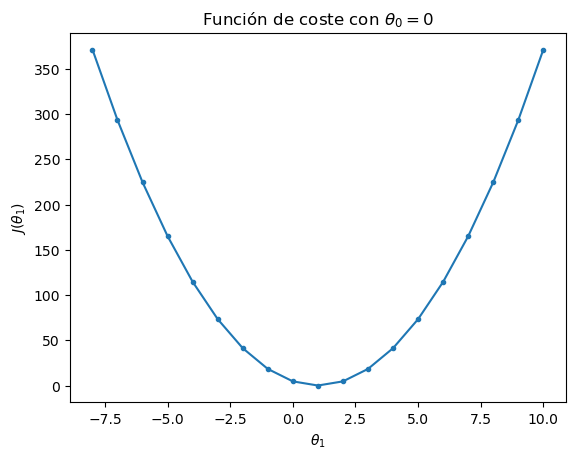

In [7]:
plt.plot(thetas1, costes, marker=".", linestyle="-")
plt.title(r"Función de coste con $\theta_0 = 0$")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$J(\theta_1)$")
plt.show()

In [8]:
theta_1_minimo = thetas1[np.argmin(costes)]
coste_minimo = costes[np.argmin(costes)]

print(f"El valor de theta_1 que minimiza la función de coste es {theta_1_minimo}, "
      f"y el valor mínimo de la función de coste es {coste_minimo:.2f}.")

El valor de theta_1 que minimiza la función de coste es 1, y el valor mínimo de la función de coste es 0.00.


In [9]:
x_values = df['X_1'].replace('m', np.nan).astype(float)
y_values = df['Y'].astype(float)

theta_1_optimo = theta_1_minimo  
theta_0_optimo = 0

y_pred = theta_0_optimo + theta_1_optimo * x_values

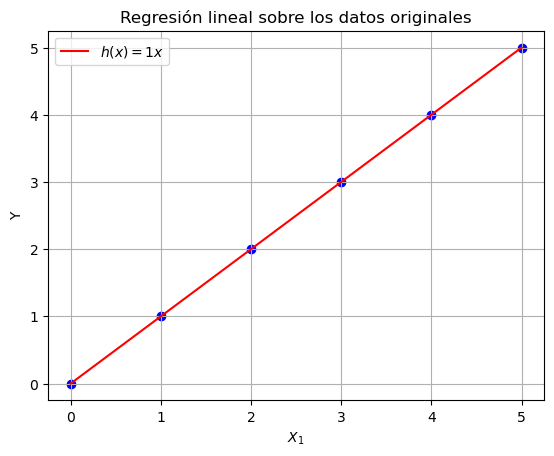

In [10]:
plt.scatter(x_values, y_values, color="blue", marker='o')

plt.plot(x_values, y_pred, label=f"$h(x) = {theta_1_optimo}x$", color="red")

plt.title("Regresión lineal sobre los datos originales")
plt.xlabel("$X_1$")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

4. Ahora el conjunto de datos es:

 |Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

In [11]:
theta_0_values = np.linspace(-10, 10, 100)
theta_1_values = np.linspace(-10, 10, 100)

theta_0_grid, theta_1_grid = np.meshgrid(theta_0_values, theta_1_values)

J_values = np.zeros(theta_0_grid.shape)

In [12]:
for i in range(len(theta_0_values)):
    for j in range(len(theta_1_values)):
        J_values[j, i] = calcular_coste(x_values, y_values, theta_0_grid[j, i], theta_1_grid[j, i])


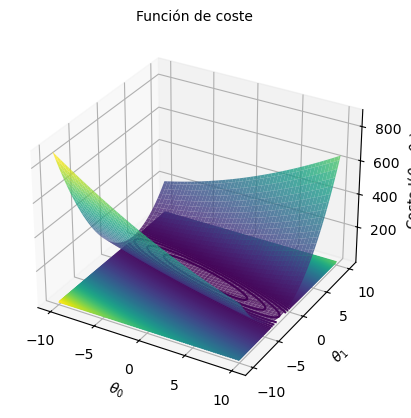

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_grid, theta_1_grid, J_values, cmap='viridis', alpha=0.8)
ax.contour(theta_0_grid, theta_1_grid, J_values, 200, linestyles="solid", offset=np.min(J_values), cmap='viridis')

ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("Coste J($\\theta_0$, $\\theta_1$)")
plt.title("Función de coste", fontsize=10)

plt.show()

5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

Se tiene una serie de puntos de salida $ Y = \{y_1, y_2, \dots, y_i, \dots, y_n\} $ que dependen de una serie de valores de entrada $ X = \{x_1, x_2, \dots, x_i, \dots, x_n\} $. Para hacer una predicción sobre cómo se comportan estos valores, definimos una función de hipótesis $ h_\theta(x) $, tal que:

$$
h_\theta(X) = \{h_\theta(x_1), h_\theta(x_2), \dots, h_\theta(x_i), \dots, h_\theta(x_n)\}
$$

donde $h_\theta(x)$ lo que representa es la predicción de nuestro modelo para un valor $x$.}

Ahora, con el objetivo de medir qué tan buena es esta predicción comparándola con los valores reales $Y$, buscamos minimizar el error cuadrático medio entre los valores predichos por $ h_\theta(x) $ y los valores reales $ y_i $.  Sabemos que la función de coste que mide este error se define como:

$$
J(\theta) = \frac{1}{2n} \sum_{i=1}^{n} \left( h_\theta(x_i) - y_i \right)^2
$$

### Caso 1D:

Cuando solo tenemos una característica $ x $, la hipótesis $ h_\theta(x)$ es:

$$
h_\theta(x) = \theta_0 + \theta_1 x
$$

Y así, la función de coste queda como:

$$
J(\theta_0, \theta_1) = \frac{1}{2n} \sum_{i=1}^{n} \left( (\theta_0 + \theta_1 x_i) - y_i \right)^2
$$


### Caso 2D: 

Cuando tenemos dos características $ x_1 $ y $ x_2 $, la hipótesis $ h_\theta(x)$ es:

$$
h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2
$$

Y así, la función de coste queda como:

$$
J(\theta_0, \theta_1, \theta_2) = \frac{1}{2n} \sum_{i=1}^{n} \left( (\theta_0 + \theta_1 x_{i,1}+ \theta_2 x_{i,2}) - y_i \right)^2
$$



# Gradiente Descendente

6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$

In [14]:
def f(x):
    return (x - 4)**2

def df(x):
    return 2 * (x - 4)

In [15]:
def gradiente_descendente(alpha, epsilon=1e-4, max_iter=1000):
    # valor inicial aleatorio
    x = 0  
    iter_count = 0

    while True:
        x_new = x - alpha * df(x)
        iter_count += 1

        if abs(x_new - x) < epsilon or iter_count >= max_iter:
            break
        
        x = x_new

    return x, f(x), iter_count

In [16]:
alphas = [0.1, 0.01, 0.001]
resultados = []

for alpha in alphas:
    minimo_x, minimo_f, iteraciones = gradiente_descendente(alpha)
    resultados.append((alpha, minimo_x, minimo_f))

df_resultados = pd.DataFrame(resultados, columns=["Alpha", "Mínimo x", "Mínimo f(x)"])
df_resultados

,Alpha,Mínimo x,Mínimo f(x)
0,0.100,3.999575,1.809251e-07
1,0.010,3.995012,2.487609e-05
2,0.001,3.458659,2.930498e-01


7. 

\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}




In [53]:
def F(x, y):
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))

In [54]:
x = np.linspace(-1, 1, 400)
y = np.linspace(-1, 1, 400)
X, Y = np.meshgrid(x, y)
Z = F(X, Y)

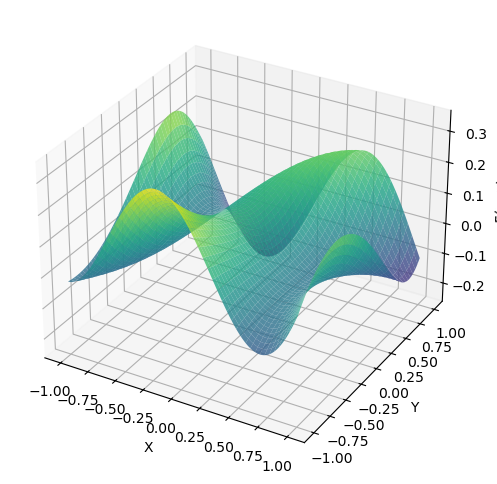

In [55]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

#ax.set_title(' F(x, y)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F(x, y)')

plt.show()

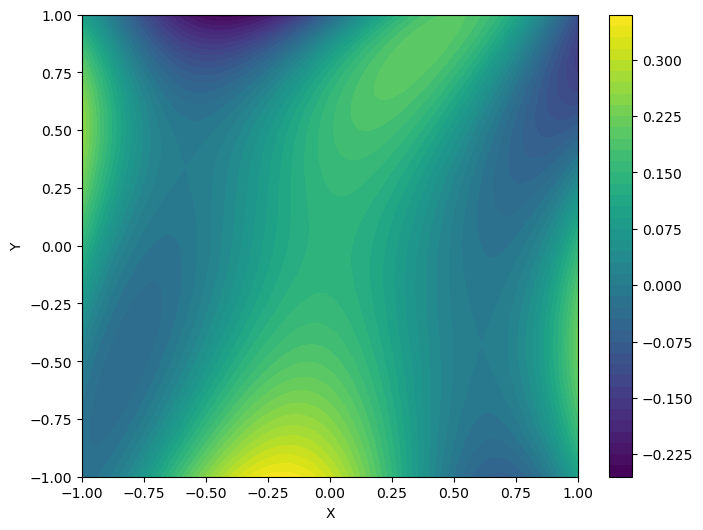

In [52]:
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, 50, cmap='viridis')
plt.colorbar(contour)

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [48]:
def dF_dx(x, y):
    return (x * np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))) - (2 * np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2 * x + 1 - np.exp(y)))

def dF_dy(x, y):
    return (-0.5 * y * np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))) + (np.exp(y) * np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2 * x + 1 - np.exp(y)))


In [70]:
def gradiente_descendente_F(alpha, epsilon=1e-4, max_iter=1000):
    x, y = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
    iter_count = 0
    
    points = [(x, y)]
    
    while iter_count < max_iter:
        x_new = x - alpha * dF_dx(x, y)
        y_new = y - alpha * dF_dy(x, y)
        
        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < epsilon:
            break
        
        x, y = x_new, y_new
        points.append((x, y))
        iter_count += 1
    
    return (x, y), F(x, y), iter_count, points

alpha = 0.01
minimo_xy, minimo_f, iteraciones, points = gradiente_descendente_F(alpha)

minimo_xy, minimo_f, iteraciones

print(f"El mínimo de la función se encuentra en (x, y) = {minimo_xy}")
print(f"El valor mínimo de la función es F(x, y) = {minimo_f}")

El mínimo de la función se encuentra en (x, y) = (-0.801248888820972, -0.4384110879224805)
El valor mínimo de la función es F(x, y) = -0.04160389618949667


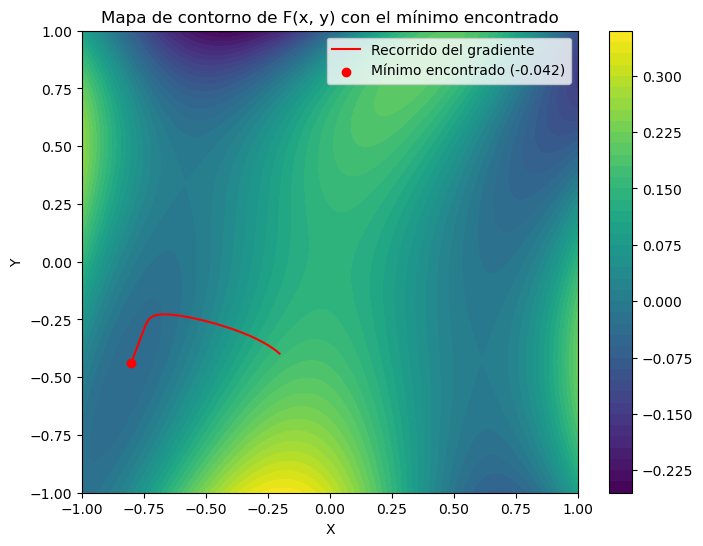

In [79]:
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, 50, cmap='viridis')
plt.colorbar(contour)

plt.title('Mapa de contorno de F(x, y) con el mínimo encontrado')
plt.xlabel('X')
plt.ylabel('Y')

points = np.array(points)
plt.plot(points[:, 0], points[:, 1], 'r-', label='Recorrido del gradiente')
plt.scatter(minimo_xy[0], minimo_xy[1], color='red', label=f'Mínimo encontrado ({minimo_f:.3f})', zorder=5)

# Mostrar la leyenda
plt.legend()

plt.show()


8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores, construya un algorítmo que permita determinar una regresión lineal.

Para construir un algoritmo que determine una regresión lineal, primero definimos un modelo lineal de la forma:
   $$
   h_\theta(X) = \theta_0 + \theta_1 X
   $$

Luego, utilizamos la función de coste que mide el error cuadrático medio entre las predicciones $ h_\theta(X) $ y los valores reales $ y $:
   $$
   J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
   $$

Y finalmente aplicamos el algoritmo de gradiente descendente para encontrar los valores óptimos de $ \theta_0 $ y $ \theta_1 $. Las actualizaciones para los parámetros son:
   $$
   \theta_0 := \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)
   $$
   $$
   \theta_1 := \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)
   $$

   Con:
   $$
   \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})
   $$
   $$
   \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}
   $$


In [96]:
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2 * X + 0.02 * np.random.random(100)

In [88]:
# modelo lineal
def h_theta(X, theta_0, theta_1):
    return theta_0 + theta_1 * X

# función de coste 
def coste(X, y, theta_0, theta_1):
    m = len(y)
    predicciones = h_theta(X, theta_0, theta_1)
    return (1 / (2 * m)) * np.sum((predicciones - y) ** 2)

# derivadas parciales del coste 
def gradiente(X, y, theta_0, theta_1):
    m = len(y)
    predicciones = h_theta(X, theta_0, theta_1)
    
    d_theta_0 = (1 / m) * np.sum(predicciones - y)
    d_theta_1 = (1 / m) * np.sum((predicciones - y) * X)
    
    return d_theta_0, d_theta_1

In [107]:
def gradiente_descendente(X, y, alpha=0.01, epsilon=1e-6, max_iter=1000):
    theta_0, theta_1 = 0.0, 0.0  
    iter_count = 0
    coste_historial = []

    while iter_count < max_iter:

        d_theta_0, d_theta_1 = gradiente(X, y, theta_0, theta_1)
        
        theta_0 -= alpha * d_theta_0
        theta_1 -= alpha * d_theta_1
        
        coste_actual = coste(X, y, theta_0, theta_1)
        coste_historial.append(coste_actual)
        
        if len(coste_historial) > 1 and abs(coste_historial[-2] - coste_historial[-1]) < epsilon:
            break
        
        iter_count += 1

    return theta_0, theta_1, coste_historial

alpha = 0.1
theta_0_opt, theta_1_opt, historial_coste = gradiente_descendente(X, y, alpha)


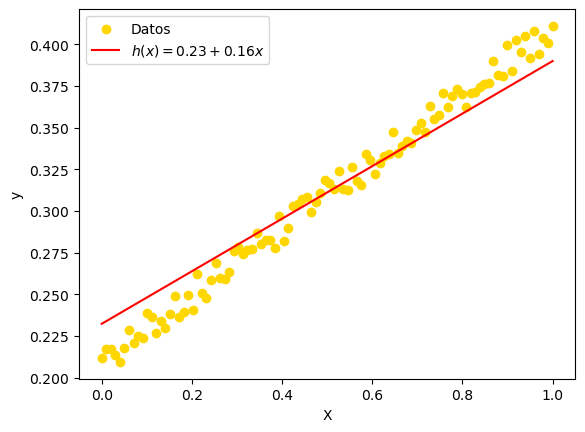

Los valores óptimos obtenidos son:

θ₀ (intercepto): 0.2323
θ₁ (pendiente) : 0.1576


In [116]:
plt.scatter(X, y, label="Datos", color="gold")
plt.plot(X, h_theta(X, theta_0_opt, theta_1_opt), color='red', label=f'$h(x) = {theta_0_opt:.2f} + {theta_1_opt:.2f}x$')


plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


print(f"Los valores óptimos obtenidos son:\n")
print(f"θ₀ (intercepto): {theta_0_opt:.4f}")
print(f"θ₁ (pendiente) : {theta_1_opt:.4f}")

9. Compare su resultado empleando la libreria linearRegresion() de sklearn.

In [118]:
from sklearn.linear_model import LinearRegression

In [124]:
model = LinearRegression()

model.fit(X.reshape(-1, 1), y)

theta_0_sklearn = model.intercept_
theta_1_sklearn = model.coef_[0]

In [125]:
print(f"Resultados de sklearn LinearRegression:\n")
print(f"θ₀ (intercepto): {theta_0_sklearn:.4f}")
print(f"θ₁ (pendiente) : {theta_1_sklearn:.4f}\n")
print(f"Mientras que nuestros resultados fueron:\n")
print(f"θ₀ (intercepto): {theta_0_opt:.4f}")
print(f"θ₁ (pendiente) : {theta_1_opt:.4f}")

Resultados de sklearn LinearRegression:

θ₀ (intercepto): 0.2102
θ₁ (pendiente) : 0.1989

Mientras que nuestros resultados fueron:

θ₀ (intercepto): 0.2323
θ₁ (pendiente) : 0.1576
